# 3DRDNN

Main pipeline for research in my Master.

## goals in this notebook

Prepare the pipeline for any 3d DNN to train on CT data.
1) data loader
2) DNN
3) Training
4) Results comparison

In [1]:
# Testing reading GPU
from distutils.version import LooseVersion
import warnings
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np
import glob
import scipy
# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print(tf.test.gpu_device_name())

TensorFlow Version: 2.8.0
/device:GPU:0


In [2]:
# Data loader
from utils import data_loader

path_train = "data\LITS_Challenge\Training_Batch_2"
path_valid = "data\LITS_Challenge\Training_Batch_1"

loader_train = data_loader.NiiDataLoader(path_train)
loader_valid = data_loader.NiiDataLoader(path_valid)

initalised with path data\LITS_Challenge\Training_Batch_2
files: 103,103
initalised with path data\LITS_Challenge\Training_Batch_1
files: 28,28


[0. 1.]


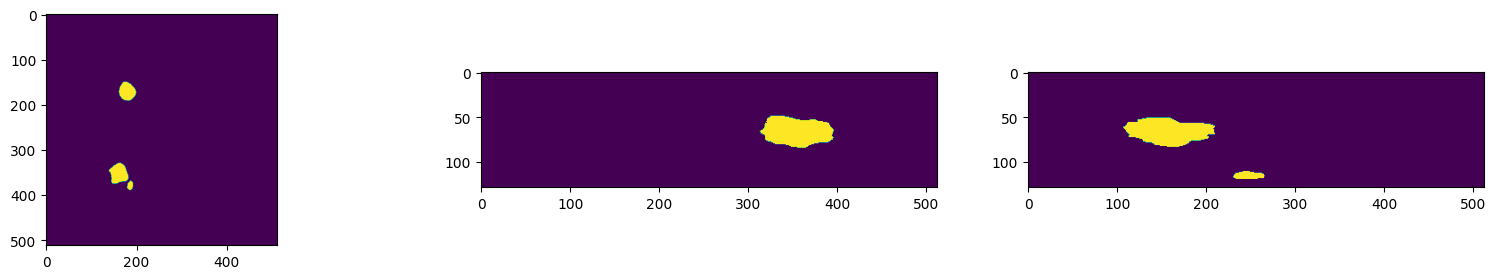

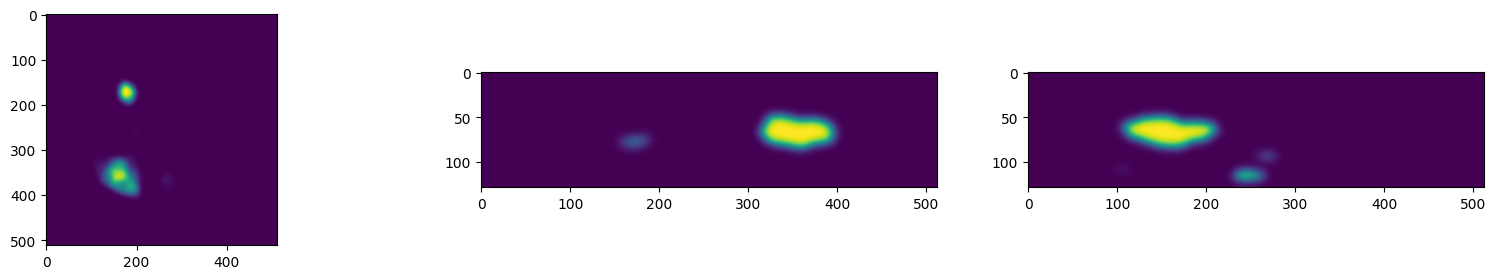

[0.000000e+00 1.917807e-14 3.835614e-14 ... 9.982932e-01 9.982939e-01
 9.982944e-01]
(129, 512, 512, 1)
(3, 3)


In [3]:
img_3d_volume = loader_train.reading_data("data\LITS_Challenge\Training_Batch_2\segmentation-28.nii")
img_3d_volume = np.where(img_3d_volume<2,0,1)
img_3d_volume = np.float32(img_3d_volume)
plt.rcParams["figure.figsize"] = (20,3)
print(np.unique(img_3d_volume))
plt.subplot(1,3,1)
plt.imshow(img_3d_volume[80,:,:,0])
plt.subplot(1,3,2)
plt.imshow(img_3d_volume[:,:,160,0])
plt.subplot(1,3,3)
plt.imshow(img_3d_volume[:,350,:,0])
plt.show()

img_3d_volume_1 = scipy.ndimage.gaussian_filter(img_3d_volume,5)
plt.subplot(1,3,1)
plt.imshow(img_3d_volume_1[80,:,:,0])
plt.subplot(1,3,2)
plt.imshow(img_3d_volume_1[:,:,160,0])
plt.subplot(1,3,3)
plt.imshow(img_3d_volume_1[:,350,:,0])
plt.show()

print(np.unique(img_3d_volume_1))
print(img_3d_volume_1.shape)
from skimage.feature import peak_local_max
peaks = peak_local_max(img_3d_volume_1[:,:,:,0],min_distance=25)
print(peaks.shape)

img_3d_liver = loader_train.reading_data("data\LITS_Challenge\Training_Batch_2\\volume-28.nii")

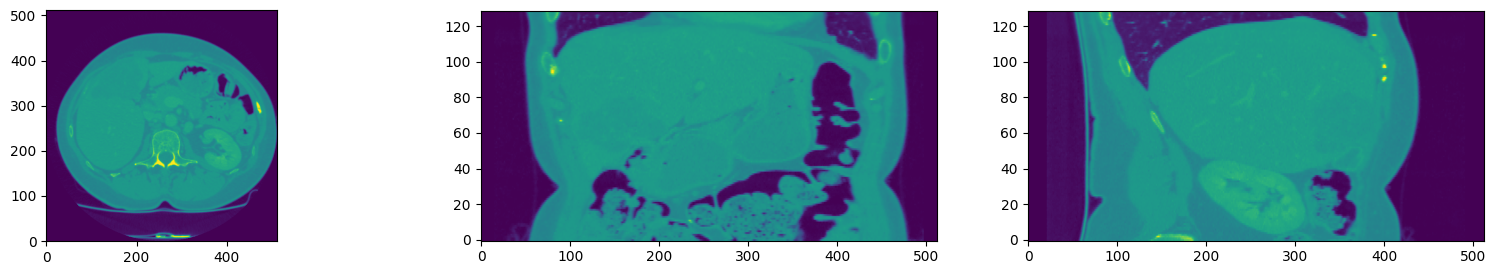

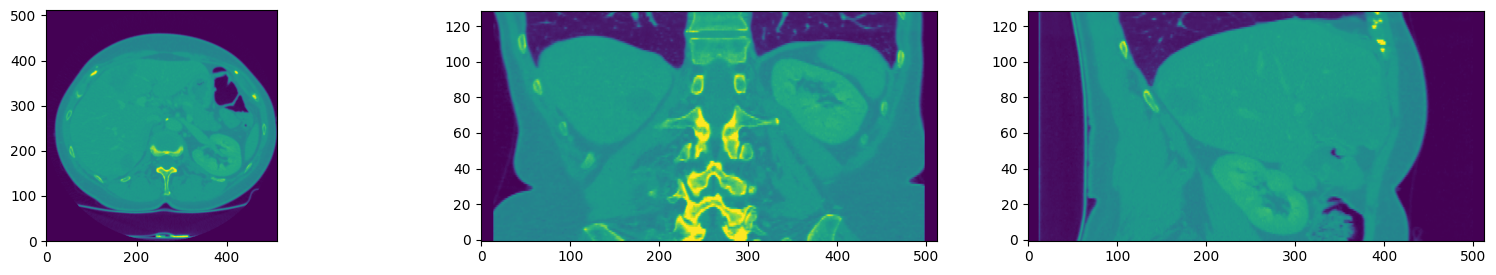

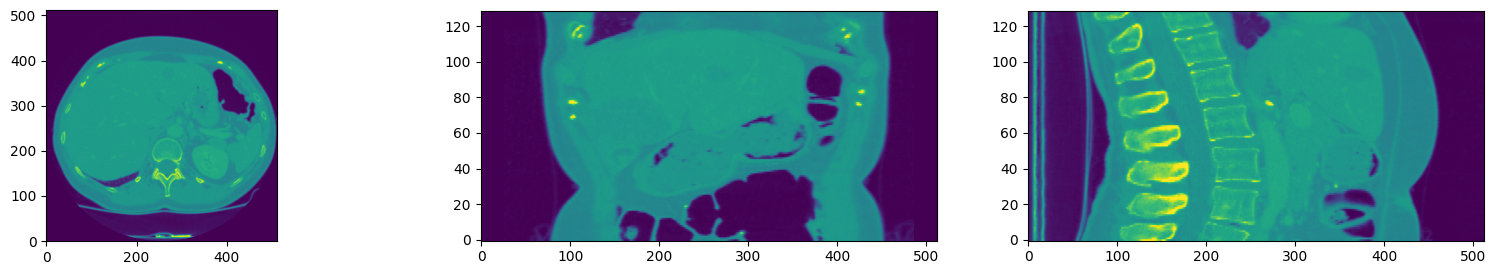

: 

In [4]:
import matplotlib.patches as patches
for cord in peaks:
    z = cord[0]
    y = cord[1]
    x = cord[2]


    fig, (ax1,ax2,ax3) = plt.subplots(1,3)
    # Display the image
    ax1.imshow(img_3d_liver[z,:,:],origin="lower",aspect="equal")
    # Create a Rectangle patch
    rect = patches.Rectangle((x-64, y-64), 128, 128, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    #ax1.add_patch(rect)

    ax2.imshow(img_3d_liver[:,y,:],origin="lower",aspect=2)
    # Create a Rectangle patch
    rect = patches.Rectangle((x-64, z-32), 128, 64, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    #ax2.add_patch(rect)

    ax3.imshow(img_3d_liver[:,:,x],origin="lower",aspect=2)
    # Create a Rectangle patch
    rect = patches.Rectangle((y-64, z-32), 128, 64, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    #ax3.add_patch(rect)

    
    plt.show()

In [2]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from skimage import measure

def plot_3d(image,): 
    p = image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes(p, level=None, spacing=(1., 1., 1.),
                   gradient_direction='descent', step_size=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.80)
    face_color = [0.3, 0.3, 0.3]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [8]:
train_generator = loader_train.data_generator_3d_lesion_chunks()
how_many = 0
examples = 2475
for example in train_generator:
    how_many+=1
    """if how_many >10:
        break
    how_many +=1
    img = example[0]
    
    img = img[:,:,:,0]
    plt.imshow(img[15])
    plt.show()"""

print(how_many)

984
